# Analyze successful runs by classifier

## Import modules

In [12]:
import openml
import re
import numpy as np
import pandas as pd
import json
from collections import Counter
from matplotlib import pyplot as plt
from utils.functions_analyze_runs import get_best_classifiers, count_classifiers

# set api key
openml.config.apikey = open('.key', 'r').readline().strip('\n')


## Identify best runs

In [2]:
# get all supervised classification tasks
tasks_all = openml.tasks.list_tasks(task_type_id=1, output_format='dataframe', tag = 'OpenML-CC18')
tasks_temp = tasks_all[0:5]
tasks_temp

,tid,ttid,did,name,task_type,status,estimation_procedure,source_data,target_feature,MajorityClassSize,MaxNominalAttDistinctValues,MinorityClassSize,NumberOfClasses,NumberOfFeatures,NumberOfInstances,NumberOfInstancesWithMissingValues,NumberOfMissingValues,NumberOfNumericFeatures,NumberOfSymbolicFeatures
3,3,1,3,kr-vs-kp,Supervised Classification,active,10-fold Crossvalidation,3,class,1669,3,1527,2,37,3196,0,0,0,37
6,6,1,6,letter,Supervised Classification,active,10-fold Crossvalidation,6,class,813,26,734,26,17,20000,0,0,16,1
11,11,1,11,balance-scale,Supervised Classification,active,10-fold Crossvalidation,11,class,288,3,49,3,5,625,0,0,4,1
12,12,1,12,mfeat-factors,Supervised Classification,active,10-fold Crossvalidation,12,class,200,10,200,10,217,2000,0,0,216,1
14,14,1,14,mfeat-fourier,Supervised Classification,active,10-fold Crossvalidation,14,class,200,10,200,10,77,2000,0,0,76,1


In [4]:
# extract well-performing flows from tasks
dict_runs = get_best_classifiers(tasks_all,
                           evaluation_metric='area_under_roc_curve',
                           cutoff_best=5,
                           keep_duplicates=True)

Task ID: 3
10231181 10231231 10232226 10256675 10233208 
Task ID: 6
6058985 6032818 10318415 6065128 10229266 
Task ID: 11
5919852 5921820 5930437 5939306 5943099 
Task ID: 12
8821561 8814855 8699489 8846592 8804593 
Task ID: 14
4797269 5803533 4797668 5257991 5900352 
Task ID: 15
6148258 8735662 8741229 7451303 8837975 
Task ID: 16
4712742 5368761 5065307 5192367 5235076 
Task ID: 18
8750238 8839285 8745403 8822644 8814189 
Task ID: 22
7505447 4573535 6055928 7487080 6060326 
Task ID: 23
2042252 2042585 2042849 2042896 2043077 
Task ID: 28
6005547 6140557 6060896 6054637 6061030 
Task ID: 29
10266422 10232375 10266756 10265804 10249170 
Task ID: 31
2083110 2083172 2083173 2088190 2083176 
Task ID: 32
6140640 8696108 8825576 8726440 6049805 
Task ID: 37
5854622 1924168 5794565 5942891 5944902 
Task ID: 43
9191689 9191863 9192100 9199524 9196529 
Task ID: 45
8816158 8938202 9195305 9118766 9114051 
Task ID: 49
4790893 4793565 4803221 4811493 4833542 
Task ID: 53
2036039 1985158 8830529 

In [5]:
# save dict to file
file = open('dict_runs_duplicates.txt', 'w')
file.write(str(dict_runs))
file.close()

## Analyze data

### Collect values from dict

In [42]:
# initialize empty df to count runs and flows
df_nr_flows_runs = pd.DataFrame(columns = ['task_id', 'nr_runs', 'nr_flows'])

# initialize empty list for all classifier names
list_clf = []

# iterate through dict
for key, value in dict_runs.items():
    
    df_nr_flows_runs.loc[len(df_nr_flows_runs)] = [key, value['nr_runs'],value['nr_flows']]
    # print(key, value['nr_runs'], value['nr_flows'])
    
    for k in value['run_data'].items():
        # print(k[1]['clf_name'])

        list_clf.append(k[1]['clf_name'])




In [43]:
df_nr_flows_runs = df_nr_flows_runs.set_index('task_id', drop = True)
df_nr_flows_runs


,nr_runs,nr_flows
task_id,,
3,35445,99
6,30493,88
11,19122,92
12,19026,86
14,18864,74
15,18810,89
16,19797,73
18,16196,80
22,15921,71


In [44]:
df_nr_flows_runs.nr_runs.sum()

1019283

### Check distribution of nr_runs over tasks

Text(0.5, 0, 'CC18 Tasks')

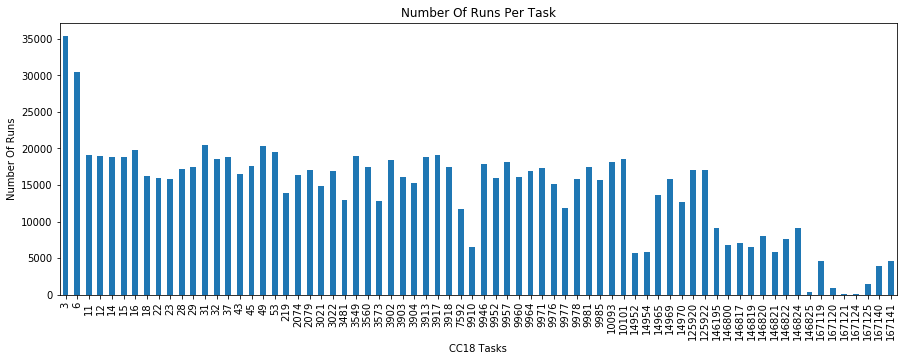

In [61]:
ax = df_nr_flows_runs.nr_runs.plot(kind = 'bar', figsize = (15,5))
ax.set_title('Number Of Runs Per Task')
ax.set_ylabel('Number Of Runs')
ax.set_xlabel('CC18 Tasks')

### Check distribution of nr_flows over tasks

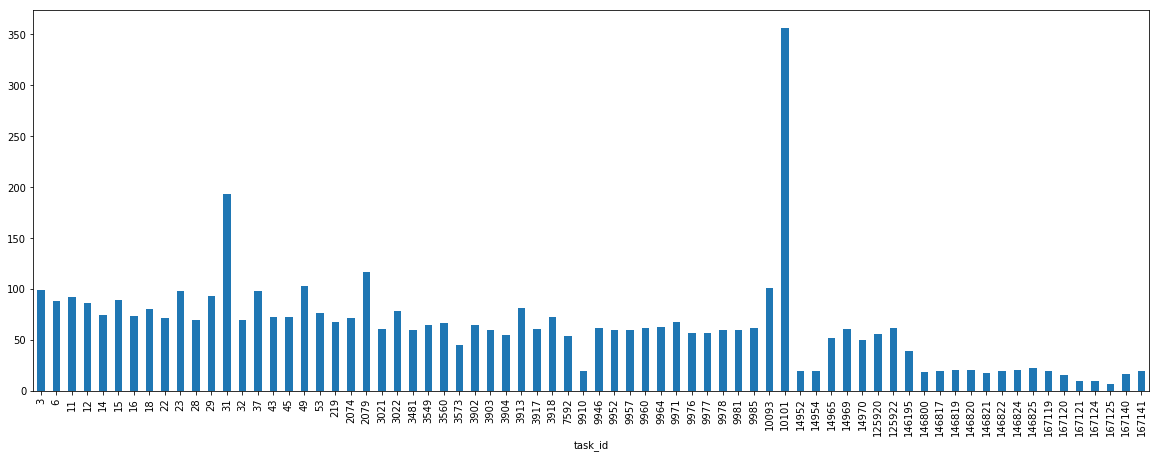

In [62]:
df_nr_flows_runs.nr_flows.plot(kind = 'bar', figsize = (20,7))

### Absolute frequencies of classifiers among top 5 over all tasks

In [63]:
# check absolute frequencies
Counter(list_clf)


Counter({'HistGradientBoostingClassifier': 126,
         'SVC': 113,
         'GradientBoostingClassifier': 6,
         'RandomForestClassifier': 71,
         'ExtraTreesClassifier': 1,
         'AdaBoostClassifier': 28,
         'KerasClassifier': 3,
         'LogisticRegression': 6,
         'MLPClassifier': 3,
         'FKCEigenPro': 2})

Text(0.5, 1.0, 'Proportions Of Top-5 Runs Of Different Classifiers')

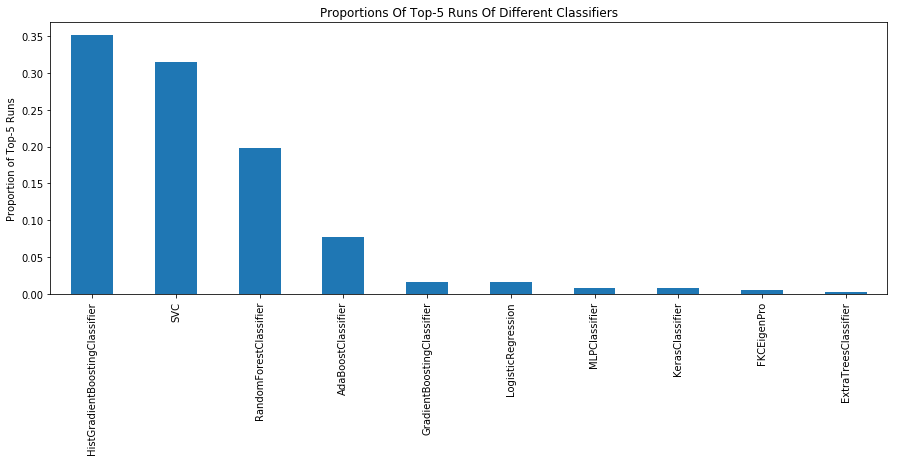

In [65]:
# plot absolute frequencies
ax = pd.Series(list_clf).value_counts(normalize = True).plot(kind='bar', figsize = (15,5))
ax.set_ylabel('Proportion of Top-5 Runs')
ax.set_title('Proportions Of Top-5 Runs Of Different Classifiers')





### Check overall number of runs for each classifier

In [13]:
baserates = count_classifiers(tasks_all, keep_duplicates = True)

Task ID: 3
Task ID: 6
Task ID: 11
Task ID: 12
Task ID: 14
Task ID: 15
Task ID: 16
Task ID: 18
Task ID: 22
Task ID: 23
Task ID: 28
Task ID: 29
Task ID: 31
Task ID: 32
Task ID: 37
Task ID: 43
Task ID: 45
Task ID: 49
Task ID: 53
Task ID: 219
Task ID: 2074
Task ID: 2079
Task ID: 3021
Task ID: 3022
Task ID: 3481
Task ID: 3549
Task ID: 3560
Task ID: 3573
Task ID: 3902
Task ID: 3903
Task ID: 3904
Task ID: 3913
Task ID: 3917
Task ID: 3918
Task ID: 7592
Task ID: 9910
Task ID: 9946
Task ID: 9952
Task ID: 9957
Task ID: 9960
Task ID: 9964
Task ID: 9971
Task ID: 9976
Task ID: 9977
Task ID: 9978
Task ID: 9981
Task ID: 9985
Task ID: 10093
Task ID: 10101
Task ID: 14952
Task ID: 14954
Task ID: 14965
Task ID: 14969
Task ID: 14970
Task ID: 125920
Task ID: 125922
Task ID: 146195
Task ID: 146800
Task ID: 146817
Task ID: 146819
Task ID: 146820
Task ID: 146821
Task ID: 146822
Task ID: 146824
Task ID: 146825
Task ID: 167119
Task ID: 167120
Task ID: 167121
Task ID: 167124
Task ID: 167125
Task ID: 167140
Task I

In [14]:
file = open('baserates.txt', 'w')
file.write(str(baserates))
file.close()

In [15]:
list_baserates = list(baserates.clf_name)

In [16]:
Counter(list_baserates)

Counter({'HistGradientBoostingClassifier': 35787,
         'SVC': 412722,
         'RandomForestClassifier': 236945,
         'AdaBoostClassifier': 34759,
         'ExtraTreesClassifier': 3664,
         'MLPClassifier': 1081,
         'TPOTWrapper': 69,
         'DecisionTreeClassifier': 103983,
         'GradientBoostingClassifier': 114379,
         'SGDClassifier': 139,
         'FKC_EigenPro': 366,
         'LogisticRegression': 643,
         'FKCEigenPro': 53180,
         'AutoSklearnWrapper': 11,
         'LinearSVC': 147,
         'BernoulliNB': 21147,
         'GaussianNB': 133,
         'KNeighborsClassifier': 51,
         'QuadraticDiscriminantAnalysis': 1,
         'MultinomialNB': 4,
         'ExtraTreeClassifier': 24,
         'LR': 4,
         'NeuralNetwork': 14,
         'LGBMClassifier': 4,
         'NuSVC': 3,
         'AutoSklearnClassifier': 7,
         'KerasClassifier': 3,
         'LinearDiscriminantAnalysis': 3,
         'automlbenchmark_autosklearn': 11})

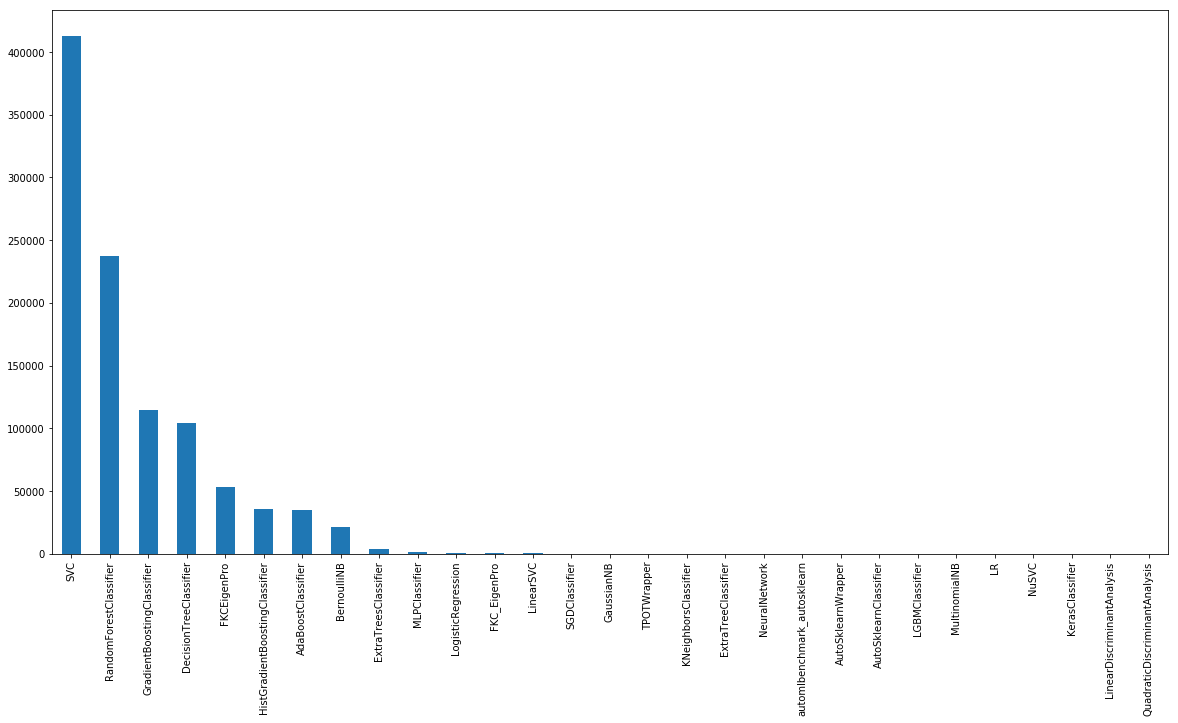

In [17]:
# plot frequencies
baserates.clf_name.value_counts().plot(kind='bar', figsize = (20,10))


In [18]:
# drop classifiers that never were among the top 5
set_best = set(list_clf)
baserates_clean = [x for x in list_baserates if x in set_best]

In [19]:
# check frequencies
Counter(baserates_clean)


Counter({'HistGradientBoostingClassifier': 35787,
         'SVC': 412722,
         'RandomForestClassifier': 236945,
         'AdaBoostClassifier': 34759,
         'ExtraTreesClassifier': 3664,
         'MLPClassifier': 1081,
         'GradientBoostingClassifier': 114379,
         'LogisticRegression': 643,
         'FKCEigenPro': 53180,
         'KerasClassifier': 3})

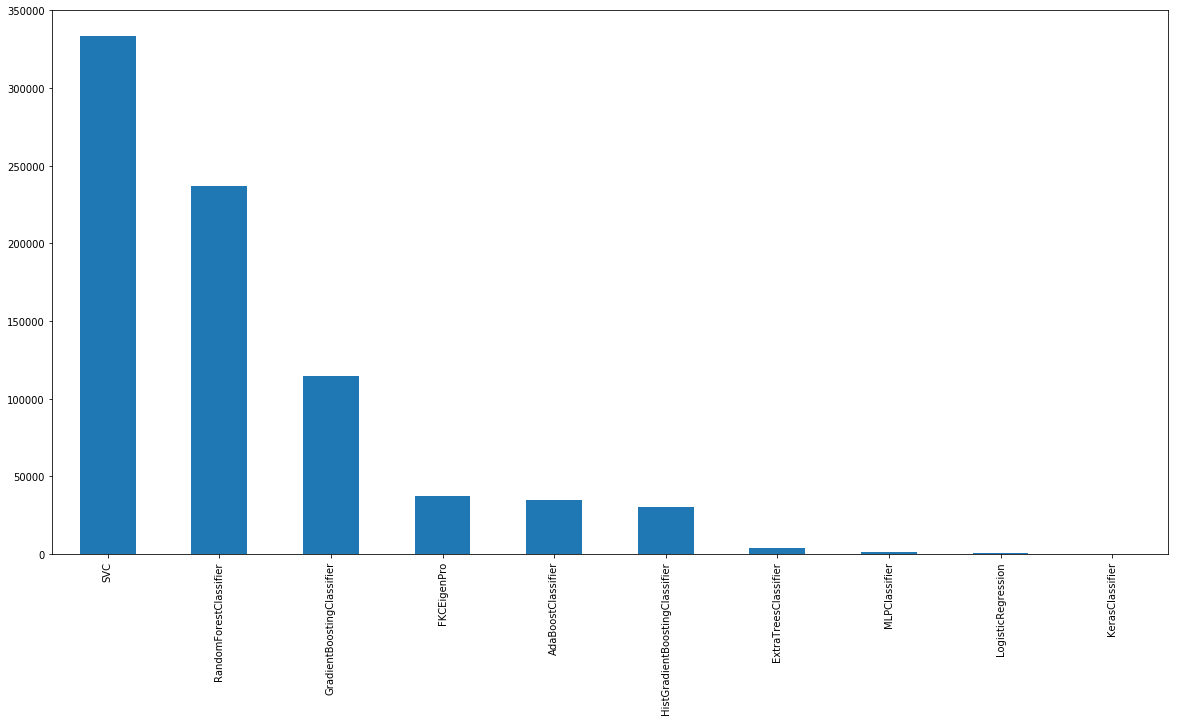

In [28]:
# plot frequencies
pd.Series(baserates_clean).value_counts().plot(kind='bar', figsize = (20,10))


### Check proportion of successful runs relative to overall number of runs per classifier

In [20]:
Counter(baserates_clean)

Counter({'HistGradientBoostingClassifier': 35787,
         'SVC': 412722,
         'RandomForestClassifier': 236945,
         'AdaBoostClassifier': 34759,
         'ExtraTreesClassifier': 3664,
         'MLPClassifier': 1081,
         'GradientBoostingClassifier': 114379,
         'LogisticRegression': 643,
         'FKCEigenPro': 53180,
         'KerasClassifier': 3})

In [21]:
Counter(list_clf)

Counter({'HistGradientBoostingClassifier': 126,
         'SVC': 113,
         'GradientBoostingClassifier': 6,
         'RandomForestClassifier': 71,
         'ExtraTreesClassifier': 1,
         'AdaBoostClassifier': 28,
         'KerasClassifier': 3,
         'LogisticRegression': 6,
         'MLPClassifier': 3,
         'FKCEigenPro': 2})

In [22]:
# define function to calculate 
def rel_freq_dict(d1, d2):
    for key, value in d1.items():
        d1[key] = value / d2.get(key, 0)
    return dict(d1)

In [23]:
# correct for baserates
rel_freq = rel_freq_dict(Counter(list_clf), Counter(baserates_clean))
rel_freq

{'HistGradientBoostingClassifier': 0.0035208315868890936,
 'SVC': 0.0002737920440393291,
 'GradientBoostingClassifier': 5.245718182533507e-05,
 'RandomForestClassifier': 0.0002996475975437338,
 'ExtraTreesClassifier': 0.0002729257641921397,
 'AdaBoostClassifier': 0.0008055467648666533,
 'KerasClassifier': 1.0,
 'LogisticRegression': 0.00933125972006221,
 'MLPClassifier': 0.0027752081406105457,
 'FKCEigenPro': 3.7608123354644604e-05}

In [24]:
# sort values
pd.Series(rel_freq).sort_values(ascending = False)

KerasClassifier                   1.000000
LogisticRegression                0.009331
HistGradientBoostingClassifier    0.003521
MLPClassifier                     0.002775
AdaBoostClassifier                0.000806
RandomForestClassifier            0.000300
SVC                               0.000274
ExtraTreesClassifier              0.000273
GradientBoostingClassifier        0.000052
FKCEigenPro                       0.000038
dtype: float64

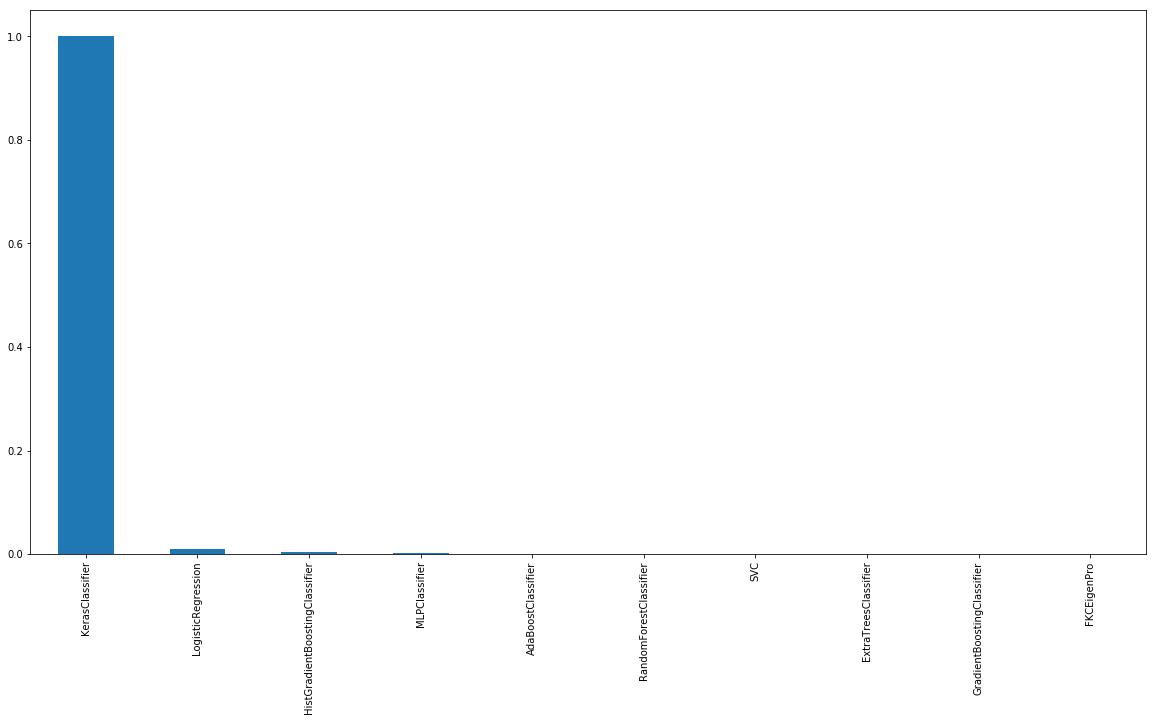

In [25]:
# plot
pd.Series(rel_freq).sort_values(ascending = False).plot(kind='bar', figsize = (20, 10))


### After dropping tasks with very few runs/flows

In [26]:
# transform dict to list

# initialize empty df to count runs and flows
df_nr_flows_runs = pd.DataFrame(columns = ['task_id', 'nr_runs', 'nr_flows'])

# initialize empty list for all classifier names
list_clf = []

# iterate through dict
for key, value in dict_runs.items():
    
    if value['nr_runs'] > 1000:
        df_nr_flows_runs.loc[len(df_nr_flows_runs)] = [key, value['nr_runs'],value['nr_flows']]
        #print(key, value['nr_runs'], value['nr_flows'])
        for k in value['run_data'].items():
            #print(k[1]['clf_name'])

            #print(k[0])
            #print(k[1])
            list_clf.append(k[1]['clf_name'])


In [27]:
df_nr_flows_runs.head()

,task_id,nr_runs,nr_flows
0,3,35445,99
1,6,30493,88
2,11,19122,92
3,12,19026,86
4,14,18864,74


In [28]:
baserates

,run_id,task_id,setup_id,flow_id,flow_name,data_id,data_name,function,upload_time,value,values,array_data,clf_name
154743,10231181,3,8156203,12736,sklearn.pipeline.Pipeline(simpleimputer=sklear...,3,kr-vs-kp,area_under_roc_curve,2019-07-18 14:06:03,0.999920,None,"[0.99992,0.99992]",HistGradientBoostingClassifier
154745,10231231,3,8156253,12736,sklearn.pipeline.Pipeline(simpleimputer=sklear...,3,kr-vs-kp,area_under_roc_curve,2019-07-18 15:48:29,0.999919,None,"[0.999919,0.999919]",HistGradientBoostingClassifier
154764,10232226,3,8157248,12736,sklearn.pipeline.Pipeline(simpleimputer=sklear...,3,kr-vs-kp,area_under_roc_curve,2019-07-21 12:58:49,0.999915,None,"[0.999915,0.999915]",HistGradientBoostingClassifier
165296,10256675,3,8167220,12736,sklearn.pipeline.Pipeline(simpleimputer=sklear...,3,kr-vs-kp,area_under_roc_curve,2019-07-28 04:45:28,0.999915,None,"[0.999915,0.999915]",HistGradientBoostingClassifier
154906,10233208,3,8158099,12736,sklearn.pipeline.Pipeline(simpleimputer=sklear...,3,kr-vs-kp,area_under_roc_curve,2019-07-23 06:24:03,0.999914,None,"[0.999914,0.999914]",HistGradientBoostingClassifier
165145,10255014,3,8155977,12736,sklearn.pipeline.Pipeline(simpleimputer=sklear...,3,kr-vs-kp,area_under_roc_curve,2019-07-28 03:52:42,0.999912,None,"[0.999912,0.999912]",HistGradientBoostingClassifier
154729,10230555,3,8155577,12736,sklearn.pipeline.Pipeline(simpleimputer=sklear...,3,kr-vs-kp,area_under_roc_curve,2019-07-17 11:20:32,0.999912,None,"[0.999912,0.999912]",HistGradientBoostingClassifier
154692,10229063,3,8154162,12736,sklearn.pipeline.Pipeline(simpleimputer=sklear...,3,kr-vs-kp,area_under_roc_curve,2019-07-05 22:40:22,0.999910,None,"[0.99991,0.99991]",HistGradientBoostingClassifier
154733,10230658,3,8155680,12736,sklearn.pipeline.Pipeline(simpleimputer=sklear...,3,kr-vs-kp,area_under_roc_curve,2019-07-17 18:13:24,0.999909,None,"[0.999909,0.999909]",HistGradientBoostingClassifier
154765,10232269,3,8157291,12736,sklearn.pipeline.Pipeline(simpleimputer=sklear...,3,kr-vs-kp,area_under_roc_curve,2019-07-21 15:48:05,0.999909,None,"[0.999909,0.999909]",HistGradientBoostingClassifier


In [29]:
temp = df_nr_flows_runs.loc[df_nr_flows_runs.nr_runs > 10000].task_id

In [30]:
baserates_clean = baserates.loc[baserates.task_id.isin(temp)]

In [31]:
Counter(baserates_clean.clf_name)

Counter({'HistGradientBoostingClassifier': 27241,
         'SVC': 366367,
         'RandomForestClassifier': 210472,
         'AdaBoostClassifier': 34328,
         'ExtraTreesClassifier': 3602,
         'MLPClassifier': 1068,
         'TPOTWrapper': 65,
         'DecisionTreeClassifier': 102307,
         'GradientBoostingClassifier': 112494,
         'SGDClassifier': 138,
         'FKC_EigenPro': 309,
         'LogisticRegression': 628,
         'FKCEigenPro': 45508,
         'AutoSklearnWrapper': 11,
         'LinearSVC': 133,
         'BernoulliNB': 20758,
         'GaussianNB': 112,
         'KNeighborsClassifier': 49,
         'QuadraticDiscriminantAnalysis': 1,
         'MultinomialNB': 4,
         'ExtraTreeClassifier': 22,
         'LR': 4,
         'NeuralNetwork': 14,
         'LGBMClassifier': 4,
         'NuSVC': 3,
         'AutoSklearnClassifier': 7,
         'KerasClassifier': 3,
         'LinearDiscriminantAnalysis': 1,
         'automlbenchmark_autosklearn': 5})

In [32]:
# drop classifiers that never performed well
set_best = set(list_clf)
baserates_clean = [x for x in list_baserates if x in set_best]

In [33]:
cbr = dict(Counter(list_baserates))
cbr_new = []
for i in cbr.items():
    if i[1] > 20:
        cbr_new.append(i[0])

In [34]:
# drop classifiers that dont occur often enough
set_n = set(cbr_new)
baserates_clean = [x for x in baserates_clean if x in set_n]
clf_clean = [x for x in list_clf if x in set_n]

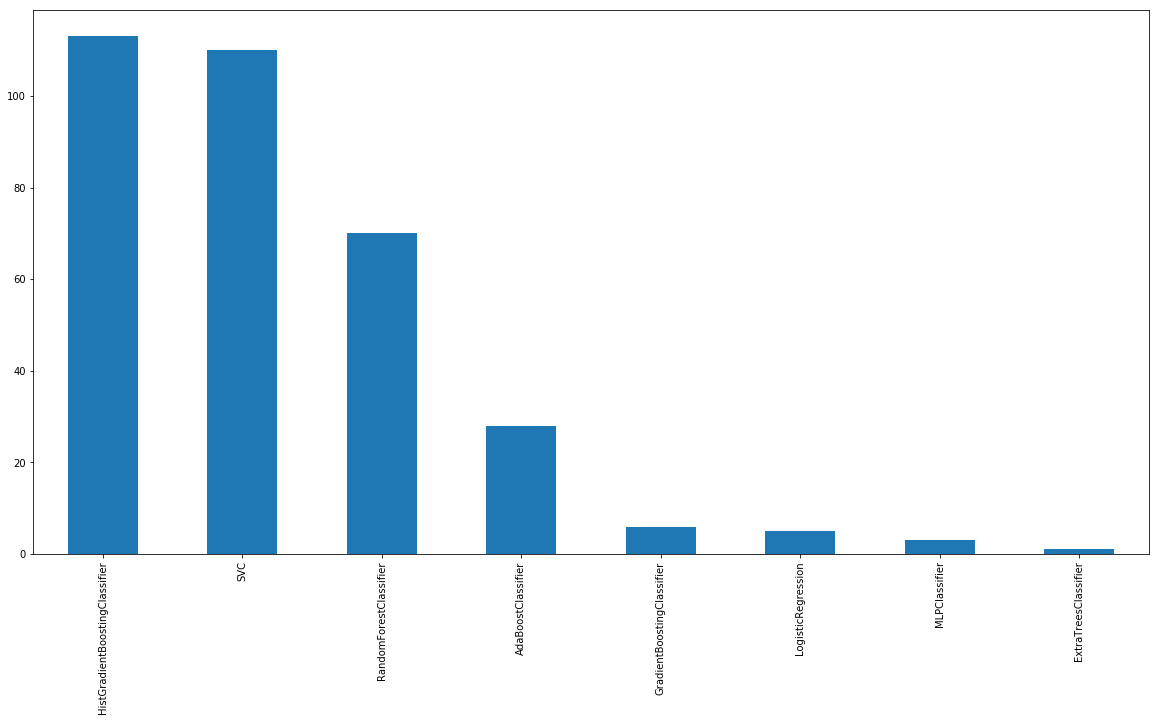

In [35]:
# plot absolute frequencies
pd.Series(clf_clean).value_counts().plot(kind='bar', figsize = (20,10))

In [36]:
# correct for baserates
rel_freq = rel_freq_dict(Counter(clf_clean), Counter(baserates_clean))
rel_freq

{'HistGradientBoostingClassifier': 0.003157571185067203,
 'SVC': 0.0002665232287108514,
 'GradientBoostingClassifier': 5.245718182533507e-05,
 'RandomForestClassifier': 0.0002954272088459347,
 'ExtraTreesClassifier': 0.0002729257641921397,
 'AdaBoostClassifier': 0.0008055467648666533,
 'LogisticRegression': 0.007776049766718507,
 'MLPClassifier': 0.0027752081406105457}

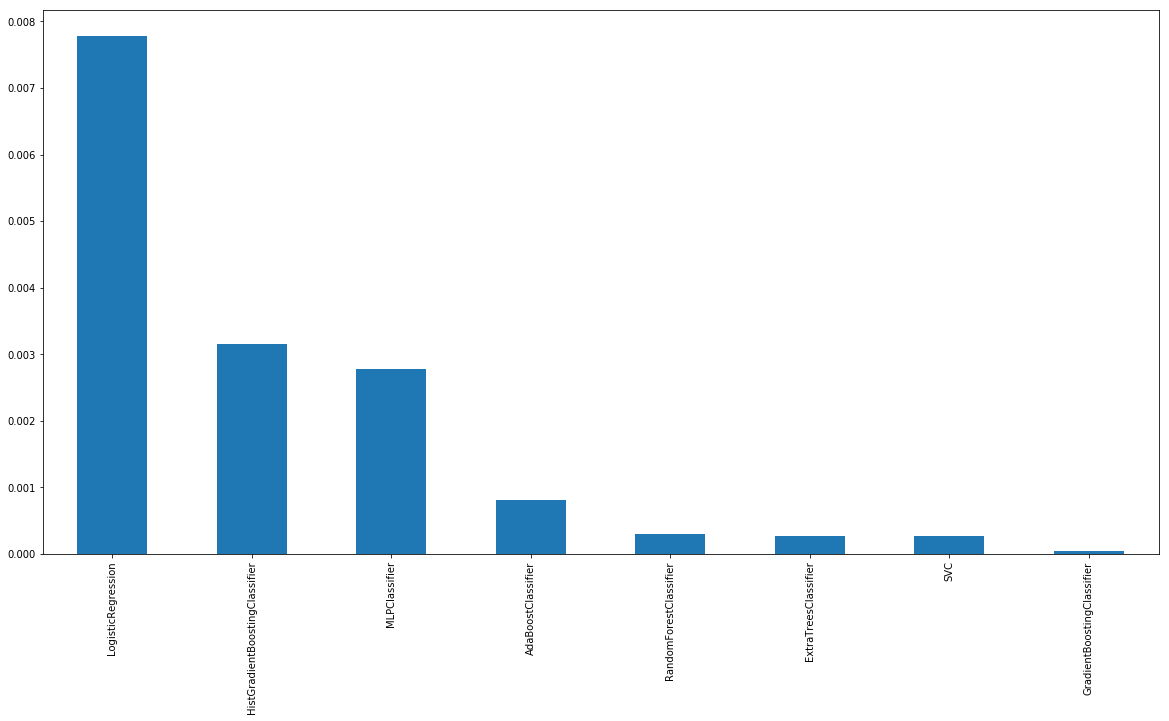

In [37]:
# plot
pd.Series(rel_freq).sort_values(ascending = False).plot(kind='bar', figsize = (20, 10))

### Get SVC flows 

In [89]:
dict_runs

{3: {'nr_runs': 32693,
  'nr_flows': 103,
  'run_data': {10231181: {'clf_name': 'HistGradientBoostingClassifier',
    'clf_params': {'l2_regularization': '1.0',
     'learning_rate': '1.0',
     'loss': '"auto"',
     'max_bins': '16',
     'max_depth': '11',
     'max_iter': '300',
     'max_leaf_nodes': '32',
     'min_samples_leaf': '5',
     'n_iter_no_change': 'null',
     'random_state': '303',
     'scoring': 'null',
     'tol': '1e-07',
     'validation_fraction': '0.2',
     'verbose': '0'}},
   10231231: {'clf_name': 'HistGradientBoostingClassifier',
    'clf_params': {'l2_regularization': '1.0',
     'learning_rate': '1.0',
     'loss': '"auto"',
     'max_bins': '8',
     'max_depth': '11',
     'max_iter': '200',
     'max_leaf_nodes': '64',
     'min_samples_leaf': '5',
     'n_iter_no_change': 'null',
     'random_state': '27032',
     'scoring': 'null',
     'tol': '1e-07',
     'validation_fraction': '0.1',
     'verbose': '0'}},
   10232226: {'clf_name': 'HistGradient

In [106]:
# transform dict to list

# initialize empty list for all classifier names
list_svc_runs = []

# iterate through dict
for key, value in dict_runs.items():
    
    print(key, '', end = '')
    
    for k in value['run_data'].items():
        if k[1]['clf_name'] == 'SVC':
            list_svc_runs.append(k[0])


3 6 11 12 14 15 16 18 22 23 28 29 31 32 37 43 45 49 53 219 2074 2079 3021 3022 3481 3549 3560 3573 3902 3903 3904 3913 3917 3918 7592 9910 9946 9952 9957 9960 9964 9971 9976 9977 9978 9981 9985 10093 10101 14952 14954 14965 14969 14970 125920 125922 146195 146800 146817 146819 146820 146821 146822 146824 146825 167119 167120 167121 167124 167125 167140 167141 

In [109]:
len(list_svc_runs)

207

In [113]:
list_svc_flows = []

for i in list_svc_runs:
    run = openml.runs.get_run(i)
    list_svc_flows.append(run.flow_id)
    

In [118]:
list(set(list_svc_flows))

[6246, 6952, 8330, 6954, 7756, 5499, 8317, 7223, 6009, 7707, 6269, 5983]

In [122]:
for i in list(set(list_svc_flows)):
    flow = openml.flows.get_flow(i)
    print(i)
    print(flow.name)
    print()

6246
sklearn.pipeline.Pipeline(dualimputer=extra.dual_imputer.DualImputer,standardscaler=sklearn.preprocessing.data.StandardScaler,svc=sklearn.svm.classes.SVC)

6952
sklearn.pipeline.Pipeline(imputation=openmlstudy14.preprocessing.ConditionalImputer,hotencoding=sklearn.preprocessing.data.OneHotEncoder,variencethreshold=sklearn.feature_selection.variance_threshold.VarianceThreshold,classifier=sklearn.svm.classes.SVC)

8330
sklearn.pipeline.Pipeline(imputation=openmlstudy14.preprocessing.ConditionalImputer,hotencoding=sklearn.preprocessing.data.OneHotEncoder,scaling=sklearn.preprocessing.data.StandardScaler,variencethreshold=sklearn.feature_selection.variance_threshold.VarianceThreshold,classifier=sklearn.svm.classes.SVC)

6954
sklearn.pipeline.Pipeline(imputation=openmlstudy14.preprocessing.ConditionalImputer,hotencoding=sklearn.preprocessing.data.OneHotEncoder,variencethreshold=sklearn.feature_selection.variance_threshold.VarianceThreshold,classifier=sklearn.svm.classes.SVC)

7756
skle

In [123]:
flow = openml.flows.get_flow(8317)


In [132]:
flow.parameters['steps']

'[{"oml-python:serialized_object": "component_reference", "value": {"key": "imputation", "step_name": "imputation"}}, {"oml-python:serialized_object": "component_reference", "value": {"key": "hotencoding", "step_name": "hotencoding"}}, {"oml-python:serialized_object": "component_reference", "value": {"key": "scaling", "step_name": "scaling"}}, {"oml-python:serialized_object": "component_reference", "value": {"key": "variencethreshold", "step_name": "variencethreshold"}}, {"oml-python:serialized_object": "component_reference", "value": {"key": "clf", "step_name": "clf"}}]'